# Exploratory data analysis

In [1]:
import pandas as pd
import preprocessing as pp
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/gyueunlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/gyueunlee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import and preprocessing

In [2]:
"""
Import data
"""
df = pd.read_csv('./data/train.csv')
df.head()

,titles,summaries,terms,ids
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']",1be0fca9ef
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']",0dc61e87d7
2,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV'],024f1c2361
3,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']",b0ba0f85f3
4,Efficient Hybrid Transformer: Learning Global-...,Semantic segmentation of fine-resolution urban...,['cs.CV'],00211d1b1b


In [3]:
"""
Preprocess data:
    - Filter duplicated features
    - Impute null entries
    - Concatenate titles and summaries
    - Multi-hot encode labels
    - Remove stopwords
    - Lemmatize
"""
df = pp.process(df, 'train')
classes = df.loc[:, ~df.columns.isin(['text', 'length'])].sum().index.tolist()
X, y = df['text'], df[classes]

/home/gyueunlee/repos/cordai-kaggle-arxiv/preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=drop_rows.index, inplace=True)
/home/gyueunlee/repos/cordai-kaggle-arxiv/preprocessing.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=drop_rows.index, inplace=True)
/home/gyueunlee/repos/cordai-kaggle-arxiv/preprocessing.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=summary_

Pandas Apply:   0%|          | 0/32323 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/32323 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/32323 [00:00<?, ?it/s]

### Preprocessed data

In [4]:
df.head()

,65D19,68T05,68T45,68U10,I.2.10,I.2.6,I.4,I.4.6,I.4.8,cs.AI,...,q-bio.NC,q-bio.QM,q-fin.ST,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.TH,text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[survey, semantic, stereo, match, semantic, de..."
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[future, ai, guide, principle, consensus, reco..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[parameter, decouple, strategy, semi, supervis..."
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[background, foreground, segmentation, interio..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[efficient, hybrid, transformer, learn, global..."


In [5]:
X.head()

0    [survey, semantic, stereo, match, semantic, de...
1    [future, ai, guide, principle, consensus, reco...
2    [parameter, decouple, strategy, semi, supervis...
3    [background, foreground, segmentation, interio...
4    [efficient, hybrid, transformer, learn, global...
Name: text, dtype: object

In [6]:
y.head()

,65D19,68T05,68T45,68U10,I.2.10,I.2.6,I.4,I.4.6,I.4.8,cs.AI,...,q-bio.BM,q-bio.NC,q-bio.QM,q-fin.ST,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.TH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
classes

['65D19',
 '68T05',
 '68T45',
 '68U10',
 'I.2.10',
 'I.2.6',
 'I.4',
 'I.4.6',
 'I.4.8',
 'cs.AI',
 'cs.AR',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DS',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.RO',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'math.DS',
 'math.IT',
 'math.NA',
 'math.OC',
 'math.PR',
 'math.ST',
 'physics.chem-ph',
 'physics.comp-ph',
 'physics.med-ph',
 'q-bio.BM',
 'q-bio.NC',
 'q-bio.QM',
 'q-fin.ST',
 'quant-ph',
 'stat.AP',
 'stat.CO',
 'stat.ME',
 'stat.ML',
 'stat.TH']

## Exploratory data analysis

In [8]:
sorted_classes = y.sum().sort_values(ascending=False).index
y = y[sorted_classes]

### Class distribution

* Classes are highly imbalanced.

* Some classes are extremely rare. e.g. `physics.med-ph` has 3 positive samples.

<AxesSubplot: >

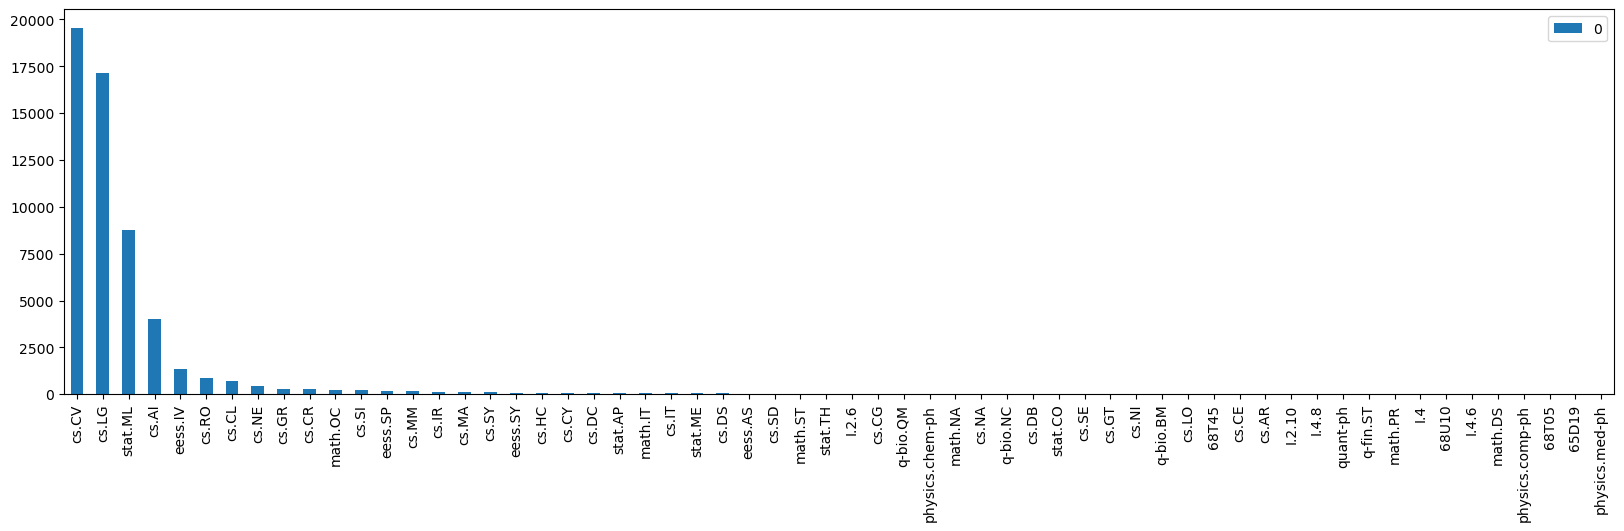

In [9]:
pd.DataFrame(y.sum()).plot.bar(figsize=(20,5))

In [10]:
pd.DataFrame(y.describe().loc['mean']).transpose()

,cs.CV,cs.LG,stat.ML,cs.AI,eess.IV,cs.RO,cs.CL,cs.NE,cs.GR,cs.CR,...,q-fin.ST,math.PR,I.4,68U10,I.4.6,math.DS,physics.comp-ph,68T05,65D19,physics.med-ph
mean,0.605358,0.530242,0.271602,0.124339,0.042354,0.02608,0.02144,0.014262,0.009374,0.008941,...,0.000186,0.000186,0.000186,0.000186,0.000186,0.000186,0.000155,0.000124,0.000124,0.000093


### Class correlations

* Most classes are uncorrelated.

* Some classes exhibit perfect/almost perfect correlations. These are likely due to arXiv classification mechanics.
    
    * e.g. `math.IT` is an alias for `cs.IT`.

<AxesSubplot: >

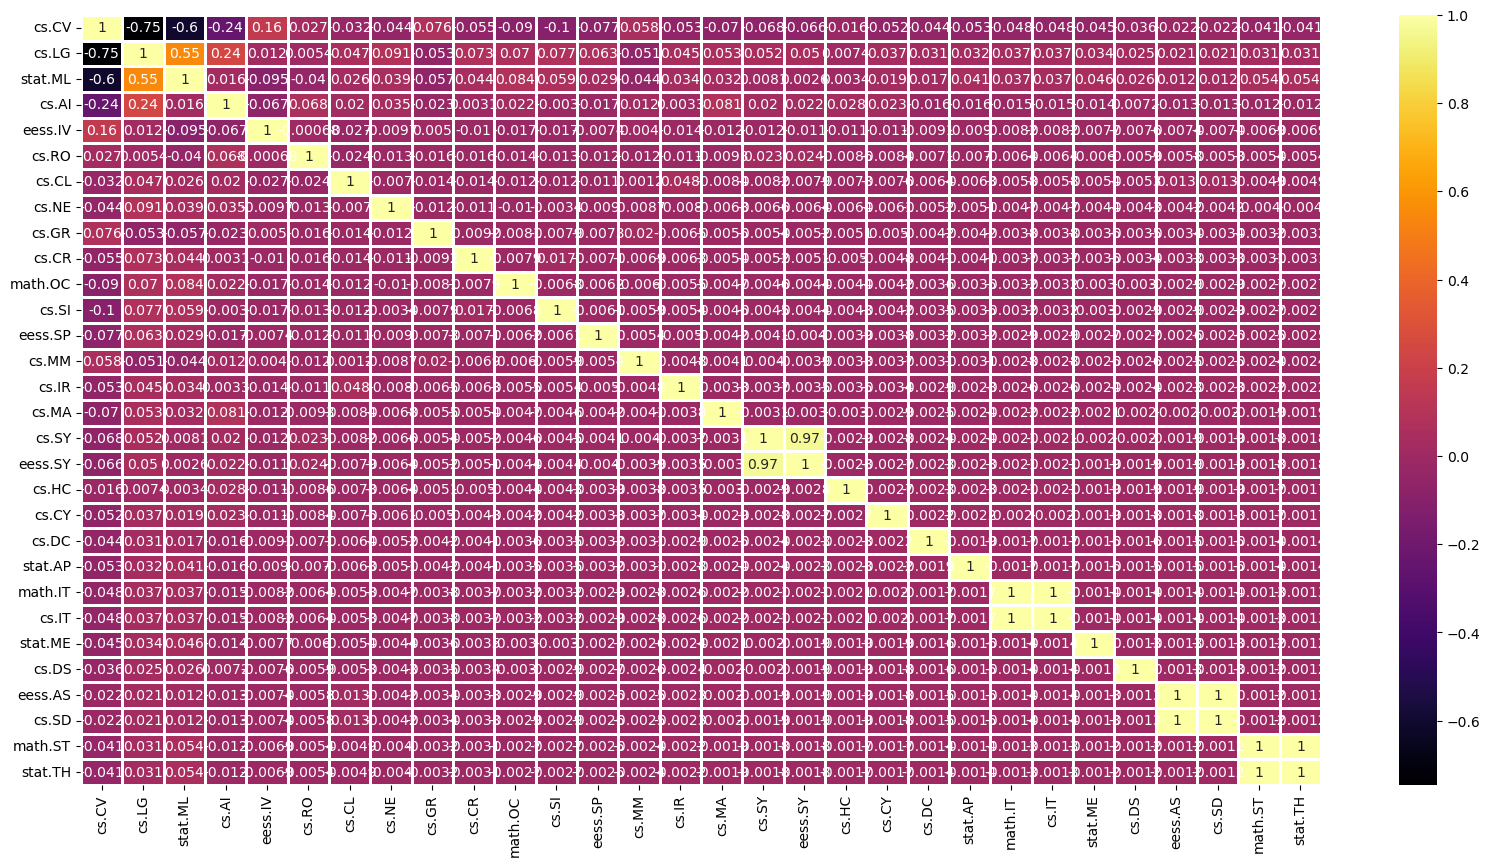

In [11]:
"""
Matrix of Pearson correlation coefficients.
Only half of the classes are shown.
Alter first, last values to view others.
"""
first, last = 0, 30
fig1, ax1 = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(
    y.iloc[:,first:last].corr(),
    annot=True,
    cmap='inferno',
    linewidths=.9, ax=ax1)

<AxesSubplot: >

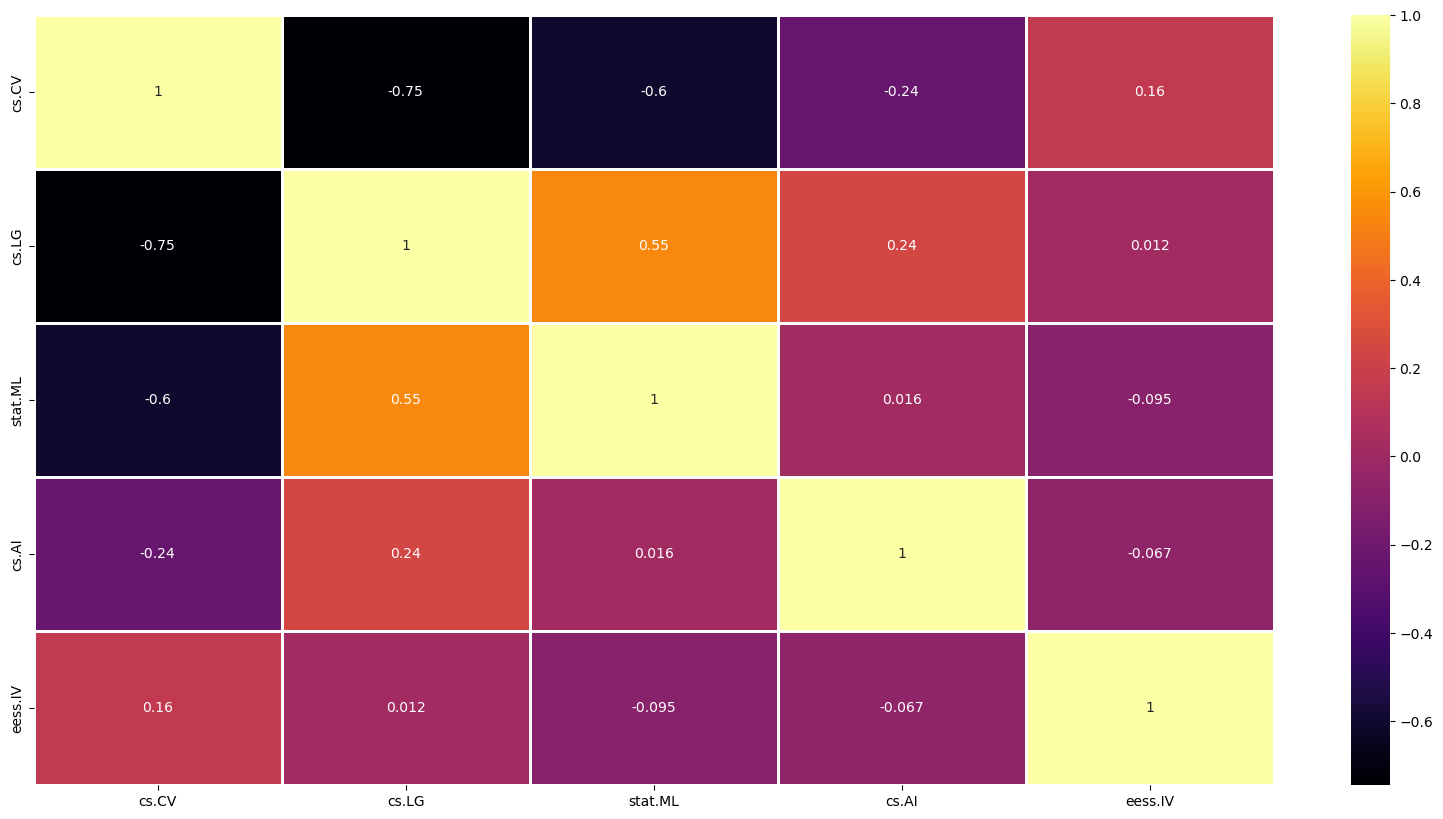

In [12]:
# Top 5 classes only
fig2, ax2 = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(
    y.iloc[:,0:5].corr(),
    annot=True,
    cmap='inferno',
    linewidths=.9, ax=ax2)